# Dataset Exploratory Data Analysis

<hr>

Exploratory Data Analysis (EDA) is the first step in analyzing any data, mostly with the intent detecting possible mistakes and checking previous assumptions by establishing relationships among the explanatory variables. Besides, it is a very useful process to promote a better understanding of the data for its preliminary processing and assist in the selection of the most appropriate models to assess it.

<hr>

### Data loading and overview


In [1]:
# Import needed libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset from UCI Repository
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

# Metadata 
print(heart_disease.metadata)

# Dataset overview
df = heart_disease.data.original
display(df.head())
display(df.describe())

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<hr>

### Variable information
Looking more closely into each variable and basic information:

In [2]:
# Variable information
variables = heart_disease.variables
display(variables)

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


<hr>

### Handling missing values

As noted above, some entries have missing values.

In [3]:
# Display number of valid entries and further information about the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


None

Given there are very few missing values, it's reasonable to drop all of the entries with missing data without much loss.

In [4]:
# Drop entries with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


<hr>

### In-depth features and target description

| Feature | Description | Value information |
| ------- | ----------- | ----------------- |
| age | Age of patient | Integer |
| sex | Binary gender assigned at birth of patient | Categorical: <br> * 0 = Female; <br> * 1 = Male |
| cp | Chest pain type | Categorical: <br> * 1 = typical angina; <br> * 2 = atypical angina; <br> * 3 = non-anginal pain; <br> * 4 = asymptomatic |
| trestbps | Resting blood pressure value (on admission to the hospital) | Integer |
| chol | Serum cholesterol value in mg/dl | Integer
| fbs | Fasting blood sugar > 120 mg/dl | Categorical: <br> * 0 = false; <br> * 1 = true |
| restecg | Resting electrocardiographic (ECG) results | Categorical: <br> * 0 = normal; <br> * 1 = having ST-T wave abnormality; <br> * 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria |
| thalach | Maximum heart rate achieved | Integer |
| exang | Exercise induced angine | Categorical: <br> * 0 = no; <br> * 1 = yes |
| oldpeak | ST depression induced by exercise relative to rest | Integer |
| slope | Slope of the peak exercise ST segment | Categorical: <br> * 1 = upsloping; <br> * 2 = flat; <br> * 3 = downsloping |
| ca | Number of major vessels (0-3) colored by fluoroscopy | Integer |
| thal | Thalium stress test results | Categorical: <br> * 3 = normal; <br> * 6 = fixed defect; <br> * 7 = reversable defect |

**NOTE:** In the table above, the feature `ca` has been described as Integer. However, due to its rather qualitative and ordinal character, it will be considered categorical, and therefore:

| Feature | Description | Value information |
| ------- | ----------- | ----------------- |
| ca | Number of major vessels colored by fluoroscopy | Categorical: <br> * 0; <br> * 1; <br> * 2; <br> * 3 |

In [5]:
# Change feature's type as needed
variables.loc[variables['name']=='ca', 'type']='Categorical'

# Separate categorical from integer features
cat_features = list(variables.loc[variables.type=='Categorical']['name'])
int_features_tg = list(variables.loc[variables.type=='Integer']['name'])
int_features = int_features_tg.copy()
int_features.remove('num')

| Target | Description | Value information |
| ------ | ----------- | ----------------- |
| num | Diagnosis of heart disease (angiographic disease status) | Categorical: <br> * 0 = < 50% diameter narrowing (negative for disease); <br> * 1, 2, 3, 4 = > 50% diameter narrowing (positive for disease) |

<hr>

### Binary transformation

Given the purpose of the present work, the target will be considered binary, classifying only the presence or absence of heart disease. In order to apply that, the dataset will be altered so that any value different from 0 will be considered the same (1).

In [6]:
# Transform any value != 0 into 1
df.loc[df['num'] != 0, 'num'] = 1

# Check new value count
df['num'].value_counts()

num
0    160
1    137
Name: count, dtype: int64

<hr>

### Categorical features: frequency tables

In [7]:
# Print frequency of each value for each categorical feature
for col in cat_features:
    print('----------------------------')
    print(f'Frequency table for {col}:')
    display(df[col].value_counts())

----------------------------
Frequency table for sex:


sex
1    201
0     96
Name: count, dtype: int64

----------------------------
Frequency table for cp:


cp
4    142
3     83
2     49
1     23
Name: count, dtype: int64

----------------------------
Frequency table for fbs:


fbs
0    254
1     43
Name: count, dtype: int64

----------------------------
Frequency table for restecg:


restecg
0    147
2    146
1      4
Name: count, dtype: int64

----------------------------
Frequency table for exang:


exang
0    200
1     97
Name: count, dtype: int64

----------------------------
Frequency table for slope:


slope
1    139
2    137
3     21
Name: count, dtype: int64

----------------------------
Frequency table for ca:


ca
0.0    174
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

----------------------------
Frequency table for thal:


thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64

**NOTE:** One of the most drastic differences visible in the frequency tables above is in the first one, which refers to the assigned at birth sex of the petients. This is only another example of sex inequality in medical research. Quoting Merone et al. [[2](#references)]:
> Historically, medical studies have excluded female participants and research data have been collected from males and generalized to females. The gender gap in medical research, alongside overarching misogyny, results in real-life disadvantages for female patients. This systematic scoping review of the literature aims to determine the extent of research into the medical research sex and gender gap and to assess the extent of misogyny, if any, in modern medical research.

Overall, such imbalance could easily cause the models to make faulty assumptions in respect to this feature.

<hr>

### Integer features: value distribution

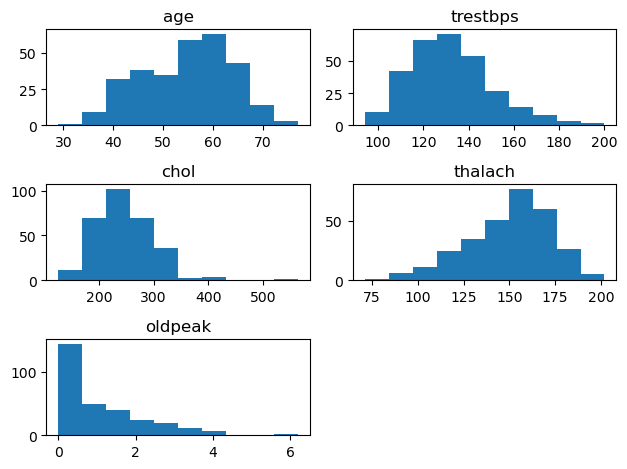

In [8]:
# Plot histograms or box plots to understand each feature distribution
df[int_features].hist(grid=False)
plt.tight_layout()
plt.show()

<hr>

### Correlation matrix

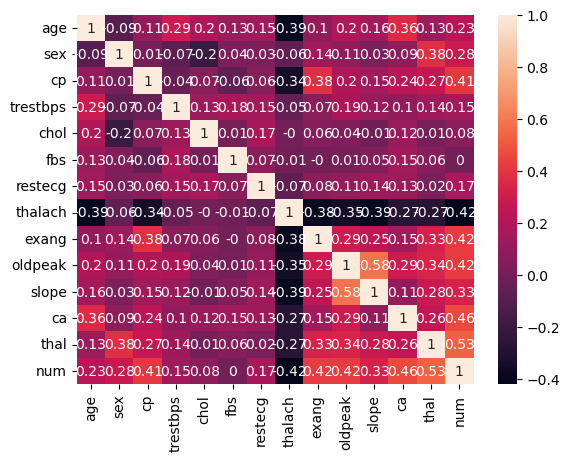

In [9]:
# Plot correlation matrix
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Important Predictors:**

The features with the highest correlations with num (thal, ca, exang, cp, oldpeak) are particularly valuable for distinguishing between the presence and absence of heart disease. These should be emphasized in any predictive modeling.

**Multicollinearity Considerations:**

Strong correlations among predictors (e.g., oldpeak and slope) suggest possible multicollinearity, which could affect model performance. Regularization techniques or dimensionality reduction methods like PCA might be useful here.

**Features to Monitor:**

Features with minimal correlation to num (e.g., chol, fbs) may still hold clinical value but might contribute less to statistical or machine learning models unless combined in specific ways.

<hr>

### Pairplot

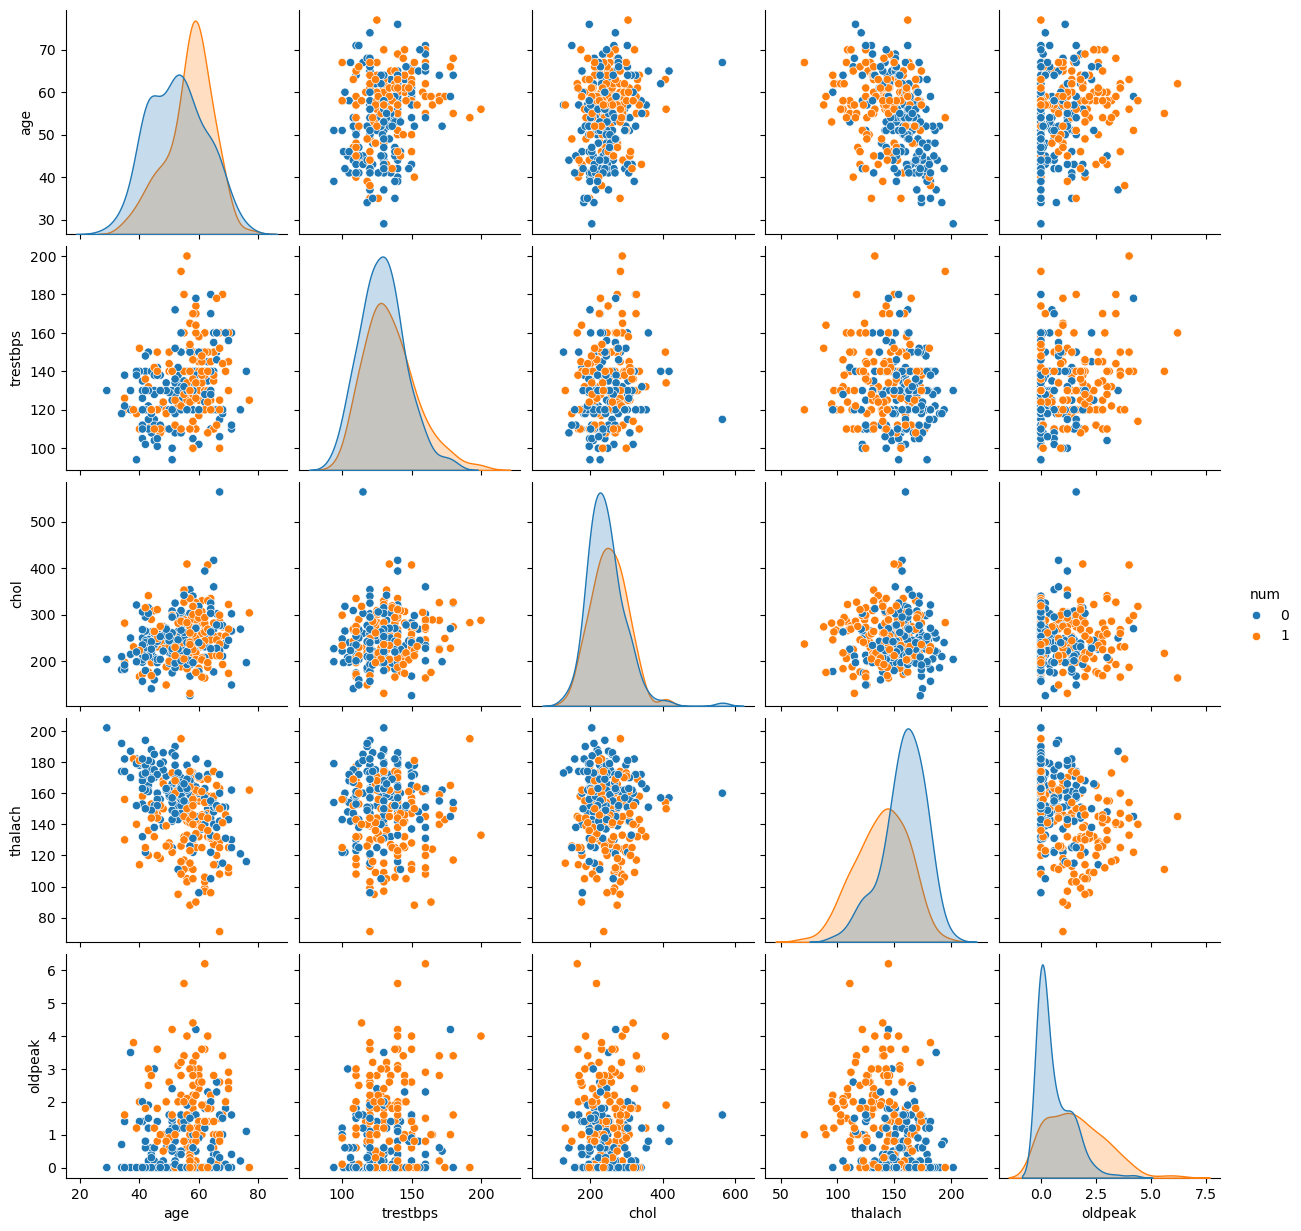

In [10]:
# Vizualize relationship between each feature with the target
sns.pairplot(df[int_features_tg], hue='num')
plt.show()

The pairplot above displays two main kinds of information: the histograms in the diagonal of the pairplot show the distribution of each individual feature, and the scatter plots display pairwise relationships between the features.

The target, which represents the presence or absence of heart disease, has been transformed into a binary classification: 0 (no disease, in blue) and 1 (disease, in orange). This allows us to visually assess how each feature distinguishes between the two classes.

Distribution-wise;

* Age (age): The age distribution appears relatively uniform, with both classes overlapping significantly, indicating age alone does not strongly differentiate between healthy and diseased patients.

* Resting Blood Pressure (trestbps) and Cholesterol (chol): Both features have overlapping distributions across classes, suggesting they may not be strong individual predictors of heart disease, although they are clinically relevant.

* Maximum Heart Rate Achieved (thalach): Generally, a higher heart rate achieved is more common in healthy individuals, and this feature shows some separation between classes.

* ST Depression (oldpeak): This feature shows meaningful separation, particularly with higher ST depression and downsloping ST segments associating with disease.

In general, thalach and oldpeak show clear visual separation, indicating their importance in distinguishing patients with heart disease from those without.
The combination of features is essential for accurate classification, as single features may not be sufficient on their own.

<hr>

### References

1. Seltman HJ. Experimental Design and Analysis. College of Humanities and Social Sciences at Carnegie Mellon University; 2018. Accessed August 12, 2024. https://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf

2. Merone L, Tsey K, Russell D, Nagle C. Sex Inequalities in Medical Research: A Systematic Scoping Review of the Literature. Women’s Health Reports. 2022;3(1):49-59. doi:https://doi.org/10.1089/whr.2021.0083
